## Exercise 11 - Networks (part two)

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071


##### Q1: Draw the graph making a distinction between the two genders (as colors, you can use 'pink' and 'lightblue').
General imports and solving the question:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Graph with 18 nodes and 35 edges.


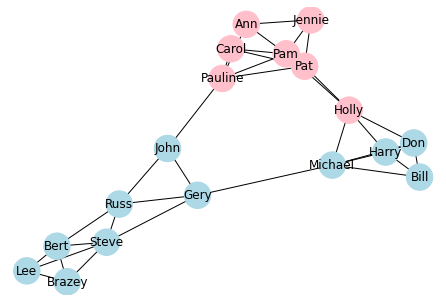

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import json
from networkx.readwrite import json_graph
import networkx as nx
import matplotlib.pyplot as plt

with open('Data/CampnetDynamics.json', 'r') as f:
    d = json.load(f)

G = json_graph.node_link_graph(d, directed=True)
print(f"Graph with {len(G.nodes())} nodes and {len(G.edges())} edges.")
color_map1 = {'M':'lightblue', 'F':'pink'}
color_map2 = {0:'black', 1:'green'}
pos = nx.spring_layout(G, k=0.5, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map1[G.nodes[node]['gender']] for node in G])
plt.show()

#### (2) Assume that men have one opinion (e.g. 0) and women a different one (e.g. 1). We then have a binary opinion (either 0 or 1). Apply the threshold model with each node changing opinion if the majority of his/her neighbors have a different one (peers pressure).?

{'Lee': 0,
 'Bert': 0,
 'Brazey': 0,
 'Steve': 0,
 'Russ': 0,
 'Gery': 0,
 'John': 0,
 'Michael': 0,
 'Harry': 0,
 'Bill': 0,
 'Don': 0,
 'Holly': 0,
 'Pauline': 1,
 'Pat': 1,
 'Pam': 1,
 'Carol': 1,
 'Ann': 1,
 'Jennie': 1}

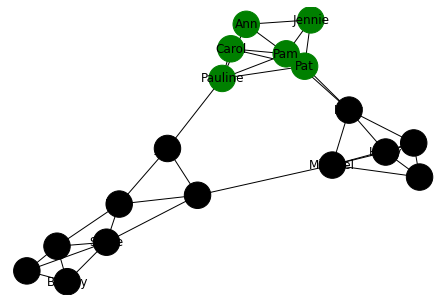

In [25]:
for node in G:
    if G.nodes[node]['gender'] == "M":
        nx.set_node_attributes(G, {node: {"opinion": 0}})
    else:
        nx.set_node_attributes(G, {node: {"opinion": 1}})

for node in G:
    opinion = 0
    for neighbor in nx.all_neighbors(G, node):
        if G.nodes[neighbor]["opinion"] == 0:
            opinion = opinion -1
        elif G.nodes[neighbor]["opinion"] == 1:
            opinion = opinion + 1
    if opinion >= 1:
        G.nodes[node]["opinion"] = 1
    else:
        G.nodes[node]["opinion"] = 0

nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map2[G.nodes[node]['opinion']] for node in G])
nx.get_node_attributes(G, "opinion")

Iteration 2:

{'Lee': 0,
 'Bert': 0,
 'Brazey': 0,
 'Steve': 0,
 'Russ': 0,
 'Gery': 0,
 'John': 0,
 'Michael': 0,
 'Harry': 0,
 'Bill': 0,
 'Don': 0,
 'Holly': 0,
 'Pauline': 1,
 'Pat': 1,
 'Pam': 1,
 'Carol': 1,
 'Ann': 1,
 'Jennie': 1}

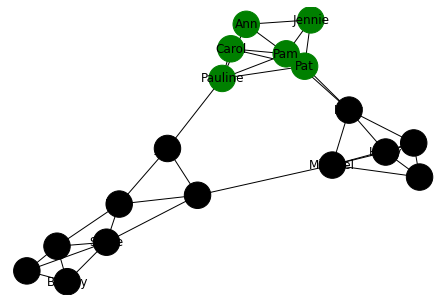

In [26]:
for node in G:
    opinion = 0
    for neighbor in nx.all_neighbors(G, node):
        if G.nodes[neighbor]["opinion"] == 0:
            opinion = opinion -1
        elif G.nodes[neighbor]["opinion"] == 1:
            opinion = opinion + 1
    if opinion >= 1:
        G.nodes[node]["opinion"] = 1
    else:
        G.nodes[node]["opinion"] = 0

nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map2[G.nodes[node]['opinion']] for node in G])
nx.get_node_attributes(G, "opinion")

Iteration 3

{'Lee': 0,
 'Bert': 0,
 'Brazey': 0,
 'Steve': 0,
 'Russ': 0,
 'Gery': 0,
 'John': 0,
 'Michael': 0,
 'Harry': 0,
 'Bill': 0,
 'Don': 0,
 'Holly': 0,
 'Pauline': 1,
 'Pat': 1,
 'Pam': 1,
 'Carol': 1,
 'Ann': 1,
 'Jennie': 1}

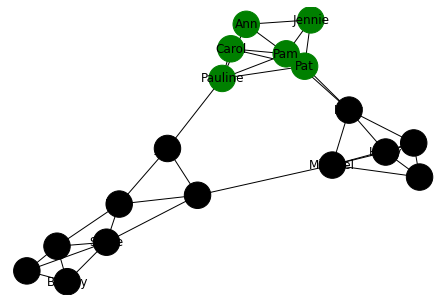

In [27]:
for node in G:
    opinion = 0
    for neighbor in nx.all_neighbors(G, node):
        if G.nodes[neighbor]["opinion"] == 0:
            opinion = opinion -1
        elif G.nodes[neighbor]["opinion"] == 1:
            opinion = opinion + 1
    if opinion >= 1:
        G.nodes[node]["opinion"] = 1
    else:
        G.nodes[node]["opinion"] = 0

nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map2[G.nodes[node]['opinion']] for node in G])
nx.get_node_attributes(G, "opinion")

#### (3) What can you observe?
Only Pat seems to be impacted.

#### (4) Repeat questions 2 and 3, but assuming that the binary opinion (0 or 1) is distributed randomly to all nodes, with 60% of the nodes having one opinion (0) and the remaining 40% having the other one (1).


{'Lee': 1,
 'Bert': 0,
 'Brazey': 1,
 'Steve': 0,
 'Russ': 0,
 'Gery': 0,
 'John': 0,
 'Michael': 0,
 'Harry': 0,
 'Bill': 0,
 'Don': 0,
 'Holly': 0,
 'Pauline': 0,
 'Pat': 0,
 'Pam': 0,
 'Carol': 0,
 'Ann': 0,
 'Jennie': 0}

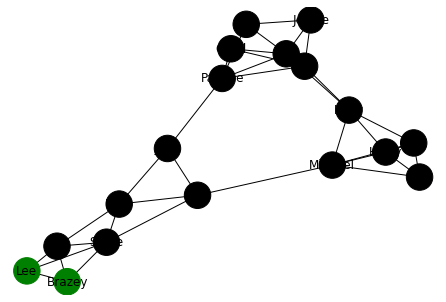

In [29]:
import random

for node in G:
    if random.randint(1, 10) <= 6:
        nx.set_node_attributes(G, {node: {"opinion": 0}})
    else:
        nx.set_node_attributes(G, {node: {"opinion": 1}})

for node in G:
    opinion = 0
    for neighbor in nx.all_neighbors(G, node):
        if G.nodes[neighbor]["opinion"] == 0:
            opinion = opinion -1
        elif G.nodes[neighbor]["opinion"] == 1:
            opinion = opinion + 1
    if opinion >= 1:
        G.nodes[node]["opinion"] = 1
    else:
        G.nodes[node]["opinion"] = 0

nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map2[G.nodes[node]['opinion']] for node in G])
nx.get_node_attributes(G, "opinion")

Iteration 2

{'Lee': 0,
 'Bert': 0,
 'Brazey': 0,
 'Steve': 0,
 'Russ': 0,
 'Gery': 0,
 'John': 0,
 'Michael': 0,
 'Harry': 0,
 'Bill': 0,
 'Don': 0,
 'Holly': 0,
 'Pauline': 0,
 'Pat': 0,
 'Pam': 0,
 'Carol': 0,
 'Ann': 0,
 'Jennie': 0}

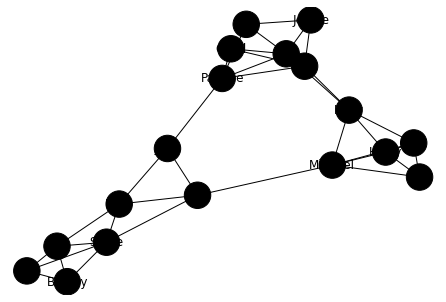

In [30]:
for node in G:
    opinion = 0
    for neighbor in nx.all_neighbors(G, node):
        if G.nodes[neighbor]["opinion"] == 0:
            opinion = opinion -1
        elif G.nodes[neighbor]["opinion"] == 1:
            opinion = opinion + 1
    if opinion >= 1:
        G.nodes[node]["opinion"] = 1
    else:
        G.nodes[node]["opinion"] = 0

nx.draw(G, pos, with_labels=True, node_size=700,
        node_color=[color_map2[G.nodes[node]['opinion']] for node in G])
nx.get_node_attributes(G, "opinion")

No need for iteration 3 as with this initialization, they all are left with opinion 1.